# Setup

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns #for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import random

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [110]:
train = pd.read_csv("train_loan.csv")
test = pd.read_csv("test_loan.csv")

In [111]:
#make copy in case changes need to be made
train_orig = train.copy()
test_orig = test.copy()
train

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[614 rows x 13 columns]

# Univariate Analysis

## 1. Target Variable Info

Percentage count:
 Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64


<AxesSubplot:>

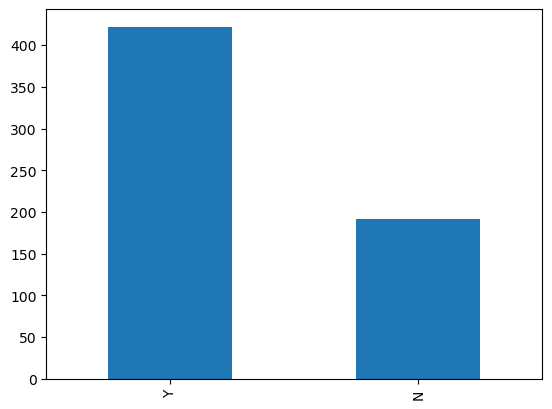

In [112]:
#goal is to predict Loan_Status
print("Percentage count:\n", 
      train['Loan_Status'].value_counts(normalize=True))
train['Loan_Status'].value_counts().plot.bar()

## 2. Independent Variable Info

### A. Binary Categorical Variables

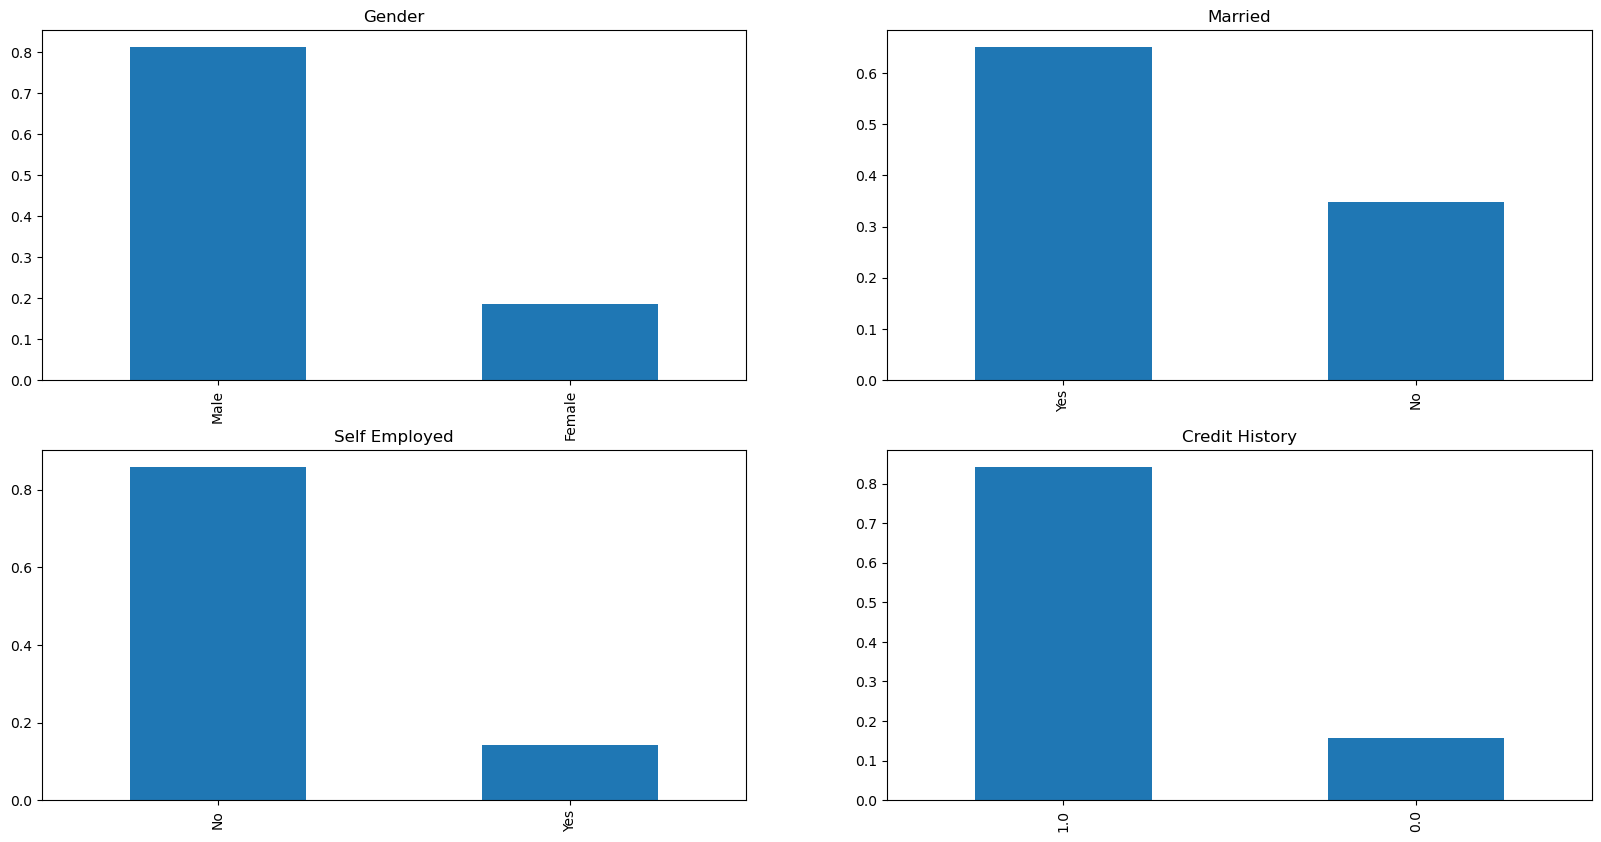

In [113]:
plt.figure(1) 

plt.subplot(221) #2 rows, 2 cols, 1st index
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title="Gender")

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title="Married")

plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title="Self Employed")

plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title="Credit History")

plt.show()

**Inferences:**
- 80% of applicants in dataset are male.
- About 65% of applicants in dataset are married.
- About 15% of applicants in dataset are self-employed.
- About 85% of applicants in dataset have repaid their debts.

### B. Ordinal Categorical Variables

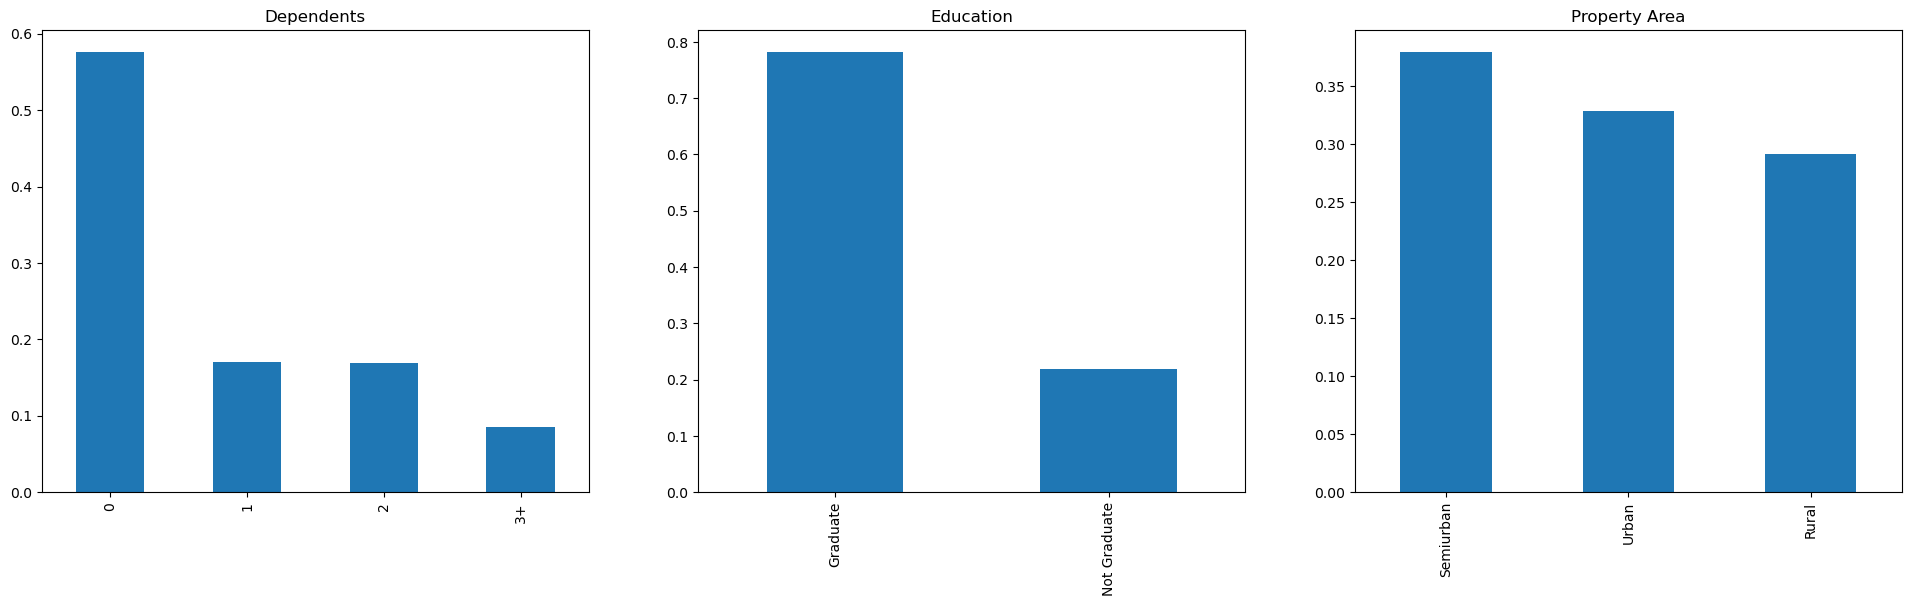

In [114]:
plt.figure(1)

plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), 
                                                          title='Dependents')

plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(figsize=(24,6), 
                                                          title='Education')

plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(24,6), 
                                                          title='Property Area')

plt.show()

**Inferences:** 
- A large majority of applicants don't have any dependents.
- Around 80% of applicants are Graduates.
- A majority of applicants are from a semiurban area.

### C. Numeric Independent Variables

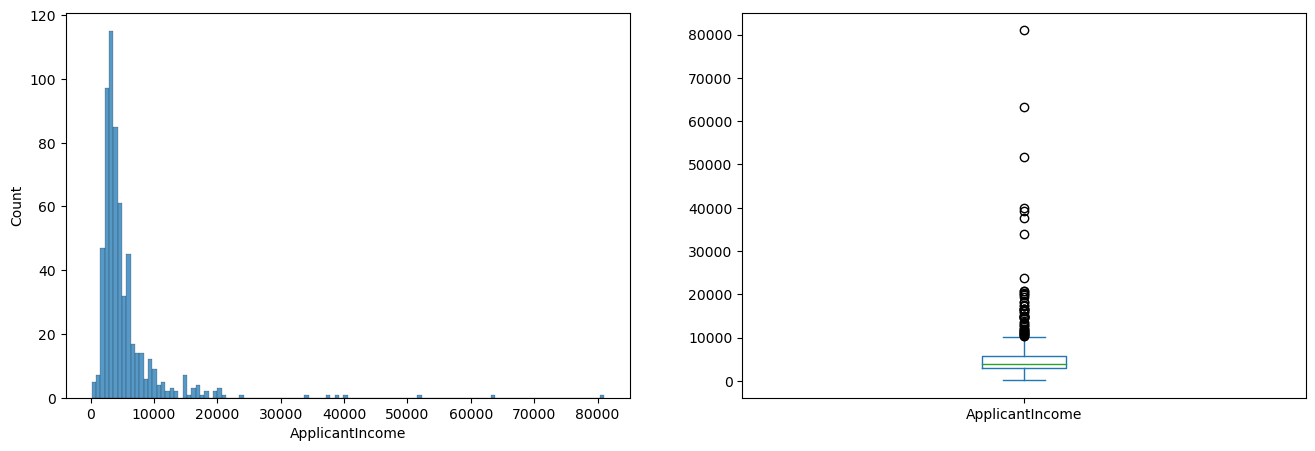

In [115]:
#Applicant Income
plt.figure(1)

plt.subplot(121)
sns.histplot(train['ApplicantIncome']);

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

**Inferences:** 
- ApplicantIncome isn't normally distributed and is skewed-left.
- Box plot shows more clearly outliers we see in histogram.

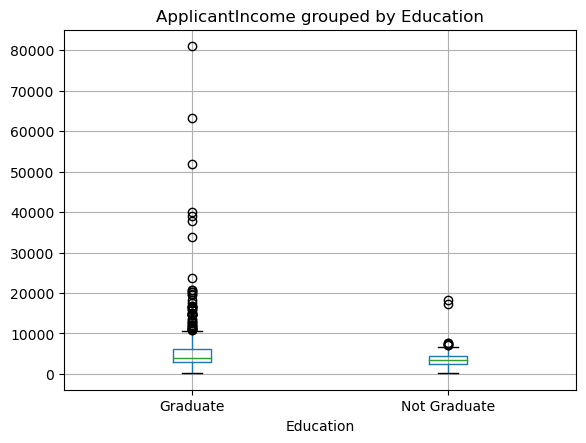

In [116]:
#Education might be a confounding variable for ApplicantIncome

train.boxplot(column='ApplicantIncome', by='Education')
plt.suptitle("")
plt.title("ApplicantIncome grouped by Education")
plt.show()

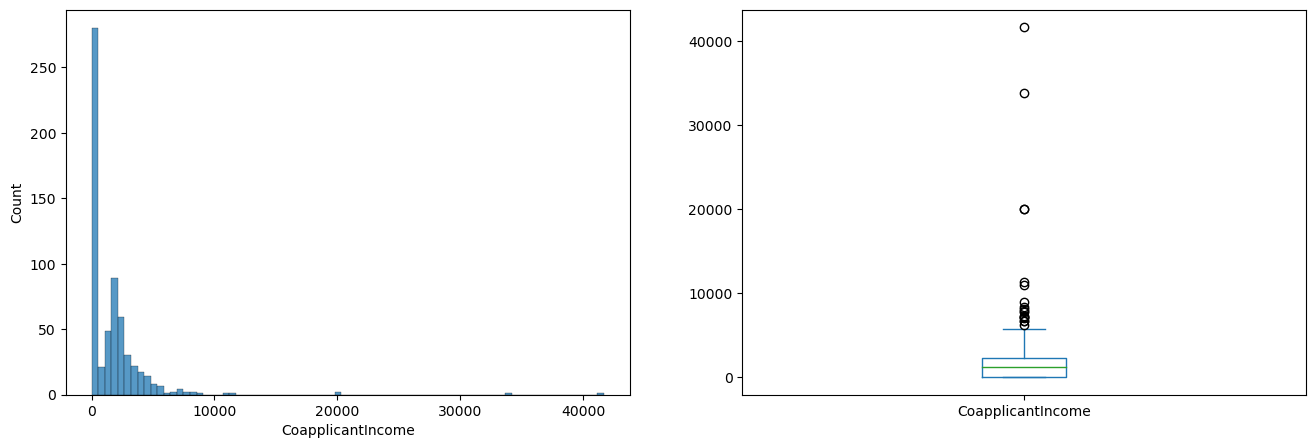

In [117]:
#Coapplicant Income
plt.figure(1)

plt.subplot(121)
sns.histplot(train['CoapplicantIncome'])

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

**Inferences:**
- We see a similar distribution to that of ApplicantIncome.
- A majority of coapplicant's income ranges from 0-5000.
- CoapplicantIncome also isn't normally distributed.

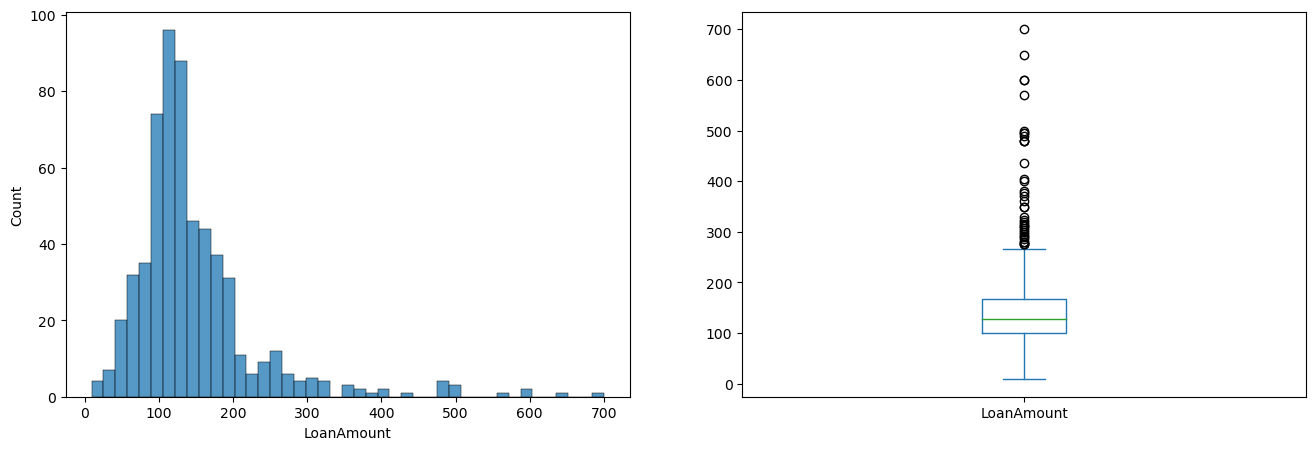

In [118]:
#Loan Amount
plt.figure(1)

plt.subplot(121)
sns.histplot(train['LoanAmount'])

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

**Inferences:**
- Distribution is relatively normal.
- Still, we see many outliers.

# Bivariate Analysis

## 1. Categorical Independent Vars vs. Target Var

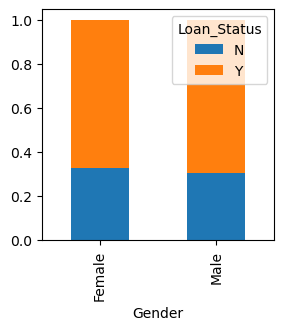

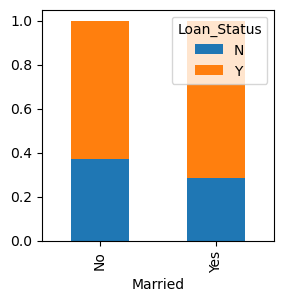

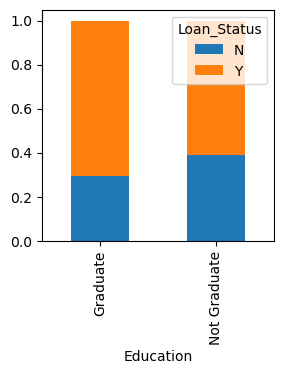

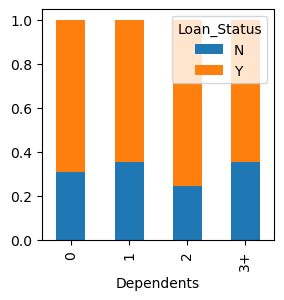

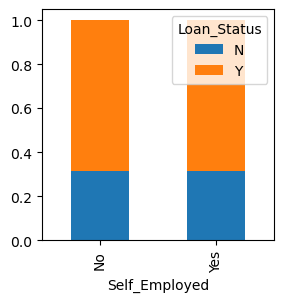

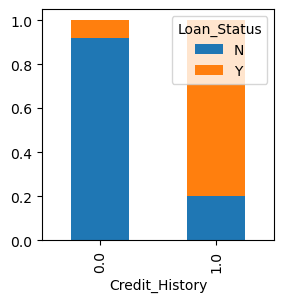

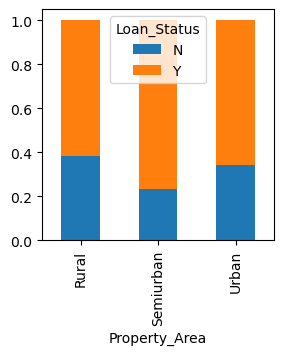

In [119]:
Gender = pd.crosstab(train['Gender'], train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,
                                                    figsize=(3,3))

Married = pd.crosstab(train['Married'], train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,
                                                      figsize=(3,3))

Education = pd.crosstab(train['Education'], train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,
                                                      figsize=(3,3))

Dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,
                                                      figsize=(3,3))

Self_Employed = pd.crosstab(train['Self_Employed'], train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,
                                                      figsize=(3,3))

Credit_History = pd.crosstab(train['Credit_History'], train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,
                                                      figsize=(3,3))

Property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True,
                                                      figsize=(3,3))
plt.show()

**Inferences:**
- Male and female applicants are approved/unapproved at similar rates.
- Married applicants are approved for loans at a higher rate than singles.
- Applicants with dependents, regardless of # of dependents, are approved at    similar rates.
- Applicants with a 1.0 credit history are approved at higher rates.
- Applicants in semiurban areas are approved for loans at a higher rate compared to those in rural or urban areas.

## 2. Numerical Independent Vars vs. Target Var

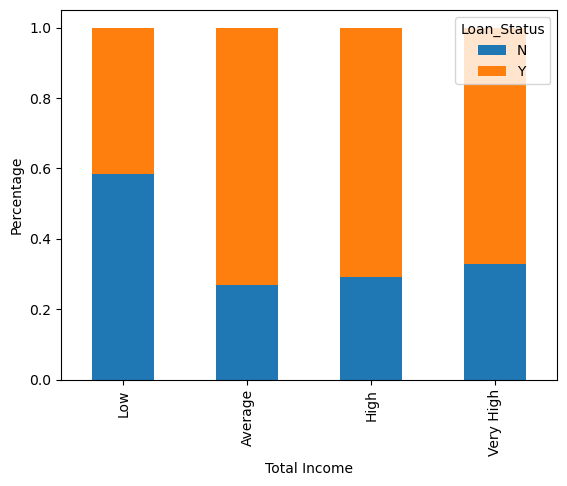

In [120]:
train['Total_Income']=train['ApplicantIncome'] + train['CoapplicantIncome']

bins = [0, 2500, 4000, 6000, 81000]
group = ['Low', 'Average', 'High', 'Very High']
train['Total_Income_bin']=pd.cut(train['Total_Income'], bins, labels=group)

Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(
    kind='bar', stacked=True)
plt.xlabel('Total Income')
plt.ylabel('Percentage')

plt.show()

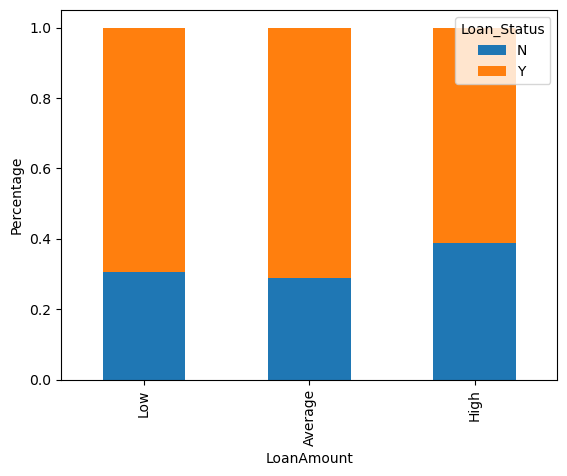

In [121]:
bins = [0, 100, 200, 700]
group = ['Low', 'Average', 'High']

train['LoanAmount_bin'] = pd.cut(train['LoanAmount'], bins, labels=group)

LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'], train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)

plt.xlabel('LoanAmount')
plt.ylabel('Percentage')
plt.show()

**Inferences:**
- The proportion of loans getting approved for applicants having low Total_Income is less compared to applicants with Average, High, and Very High Income.
- The proportion of approved loans is higher for Low and Average Loan Amounts as compared to that of a High Loan Amount.

## 3. Correlation Between Independent Variables

<AxesSubplot:>

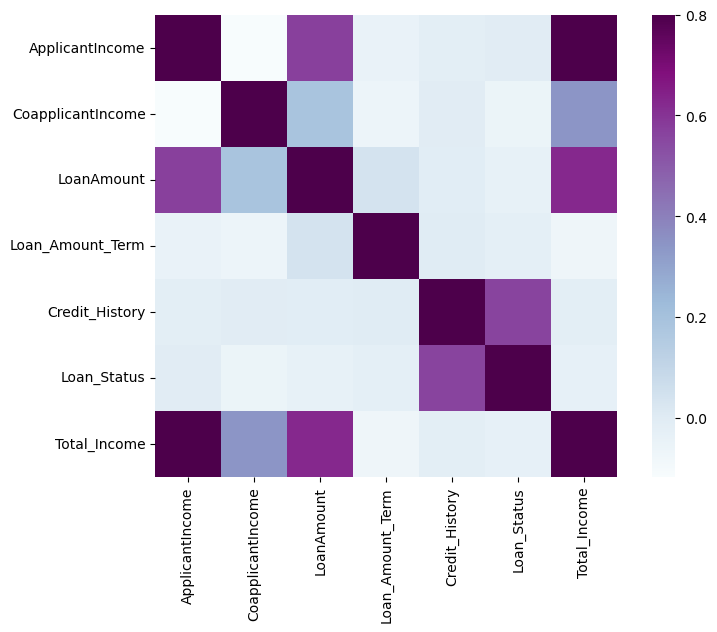

In [122]:
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

matrix = train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=0.8, square=True, cmap="BuPu")

**Inferences:**
- The most correlated variables are ApplicantIncome/LoanAmount and Credit_History/Loan_Status.

# Data Cleaning

## 1. Missing Value Imputation

In [123]:
#Find out how many null values there are

train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Total_Income          0
Total_Income_bin      0
LoanAmount_bin       22
dtype: int64

In [124]:
#Let's drop the custom columns we made previously
train = train.drop(columns=['Total_Income', 'Total_Income_bin', 'LoanAmount_bin'])

**Note:**
- For numerical variables, we replace null values with either the mode or mean
- For categorical variables, we replace null values with the mode



In [125]:
#Returns all non-null vals for a specific column as a list
def na_rand_replace(df, col_name):
    
    all_vals = df.loc[df[col_name].notnull()]
    col_vals = all_vals[col_name].tolist()
    
    df[col_name].fillna(random.choice(col_vals), inplace = True)
    
    

In [126]:
#Returns all non-null vals for a specific column as a list
def na_prand_replace(df, col_name):
    # Get all non-null values for the specified column
    all_vals = df.loc[df[col_name].notnull()]
    # Get the unique values in the column
    col_vals = all_vals[col_name].unique()
    # Get the value counts normalized (as percentages) for the unique values
    perc_count = all_vals[col_name].value_counts(normalize=True).reindex(col_vals).tolist()

    # Create a function to replace NaNs with random choices following the distribution
    def random_choice():
        return random.choices(col_vals, weights=perc_count, k=1)[0]

    # Apply the random choice function to each NaN value using apply() and fillna()
    df[col_name] = df[col_name].apply(lambda x: random_choice() if pd.isnull(x) else x)

In [127]:
#Categorical Variable Imputation
na_prand_replace(train, 'Gender')
na_prand_replace(train, 'Married')
na_prand_replace(train, 'Dependents')
na_prand_replace(train, 'Self_Employed')
na_prand_replace(train, 'Credit_History')


In [128]:
#Numerical Variable Imputation
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], 
                                 inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [129]:
#Double check that all null values have been imputed
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [130]:
#Now let's apply the same treatment to the test dataset
na_prand_replace(test, 'Gender')
na_prand_replace(test, 'Married')
na_prand_replace(test, 'Dependents')
na_prand_replace(test, 'Self_Employed')
na_prand_replace(test, 'Credit_History')
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], 
                                 inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

## 2. Outlier Treatment

In [131]:
#We'll apply a log transformation to LoanAmount to treat outliers
train['LoanAmount_log'] = np.log(train['LoanAmount'])


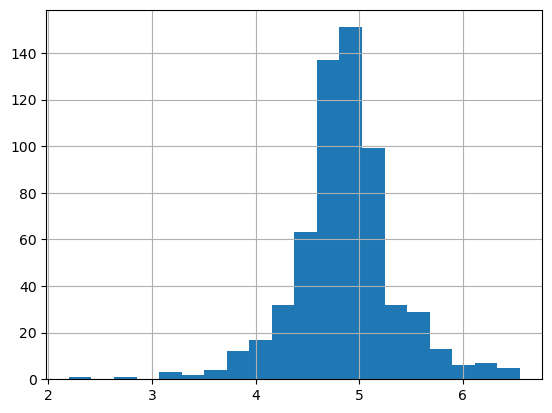

In [132]:
#Visualization of log treatment
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

# Model Building

## 1. Simple Logistic Regression

In [133]:
train

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes          3      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0       128.0             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area  Loan_Status  LoanAmount_log  
0               1.0         Urban            1        4.852030  
1               1.0         Rural            0        4.852030  
2               1.0         Urban            1        4.189655  
3               1.0         Urban            1        4.787492  
4               1.0         Urban            1        4.948760  
..              ...           ...          ...             ...  
609             1.0         Rural            1        4.262680  
610             1.0         Rural            1        3.688879  
611             1.0         Urban            1        5.533389  
612             1.0         Urban            1        5.231109  
613             0.0     Semiurban            0        4.890349  

[614 rows x 14 columns]

In [134]:
#Drop Loan_ID as the variable doesn't affect our target Loan_Status
train = train.drop('Loan_ID', axis=1)
test = test.drop('Loan_ID', axis=1)

In [135]:
#Create separate dataset w/o target for sklearn

X = train.drop('Loan_Status',axis=1)
y = train.Loan_Status

In [136]:
#Create dummy variables for categorical variables

X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [137]:
#Divide train dataset using sklearn

x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3)

In [138]:
#Fit logistic regression  model

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, 
                  intercept_scaling=1, max_iter=100, multi_class='over', n_jobs=1
                  , penalty='12', random_state=1, solver='liblinear', tol=0.0001,
                  verbose=0, warm_start=False)

LogisticRegression(multi_class='over', n_jobs=1, penalty='12', random_state=1,
                   solver='liblinear')

In [139]:
#Check accuracy of predictions

pred_cv = model.predict(x_cv)
accuracy_score(y_cv, pred_cv)

0.7837837837837838

## 2. Stratified K-folds Cross Validation

In [140]:
#Make cross validation logistic model

i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.iloc[train_index], X.iloc[test_index]
    ytr, yvl = y.iloc[train_index], y.iloc[test_index]
    
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl, pred_test)
    print('accuracy_score', score)
    
    i += 1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:, 1]


1 of kfold 5
accuracy_score 0.8048780487804879

2 of kfold 5
accuracy_score 0.8211382113821138

3 of kfold 5
accuracy_score 0.7723577235772358

4 of kfold 5
accuracy_score 0.7723577235772358

5 of kfold 5
accuracy_score 0.7868852459016393


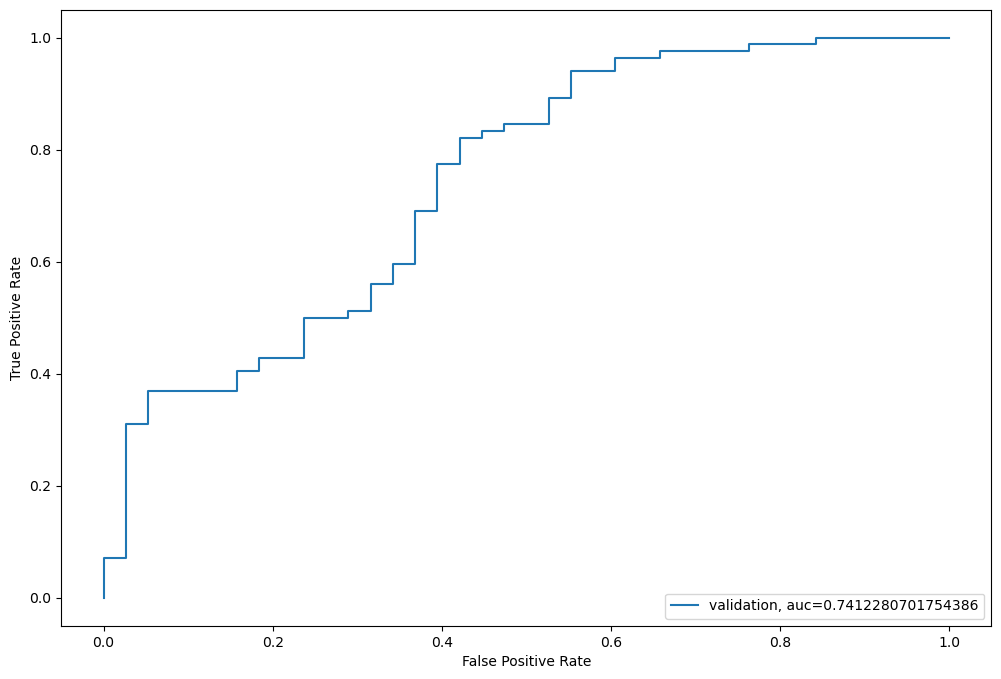

In [141]:
#Visualize ROC curve

fpr, tpr, _ = metrics.roc_curve(yvl, pred)
auc = metrics.roc_auc_score(yvl, pred)

plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, label="validation, auc=" + str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

## 3. Feature Engineering


<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

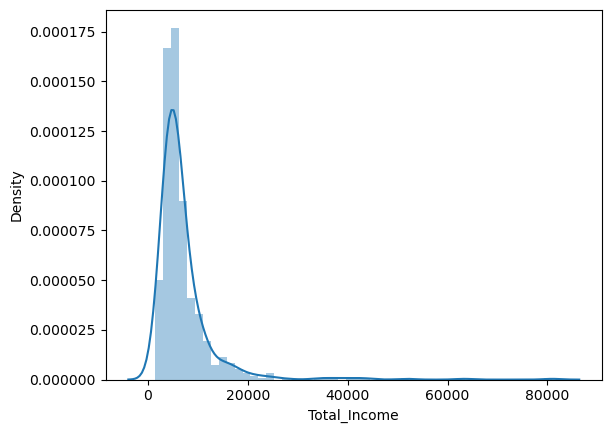

In [142]:
#Come up with new features that might affect target

train['Total_Income'] = train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income'] = test['ApplicantIncome']+test['CoapplicantIncome']

sns.distplot(train['Total_Income'])

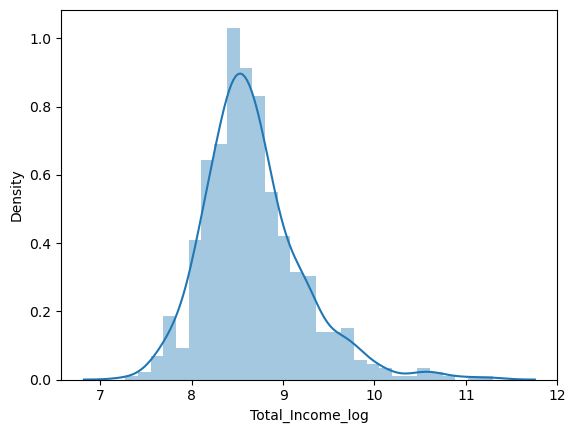

In [143]:
#Normalize total income

train['Total_Income_log'] = np.log(train['Total_Income'])
sns.distplot(train['Total_Income_log'])
test['Total_Income_log'] = np.log(test['Total_Income'])

<AxesSubplot:xlabel='EMI', ylabel='Density'>

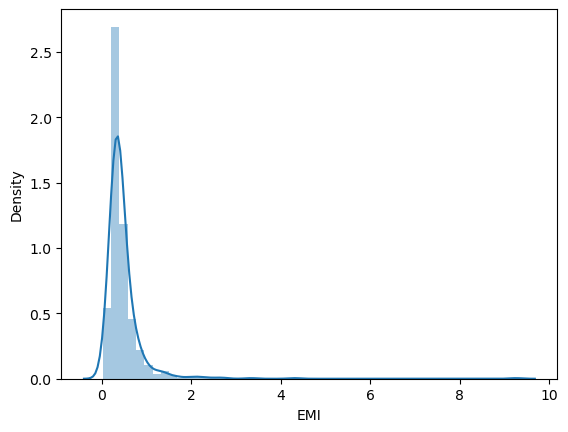

In [144]:
#New EMI feature

train['EMI'] = train['LoanAmount']/train['Loan_Amount_Term']
test['EMI'] = test['LoanAmount']/test['Loan_Amount_Term']

sns.distplot(train['EMI'])

<AxesSubplot:xlabel='Balance Income', ylabel='Density'>

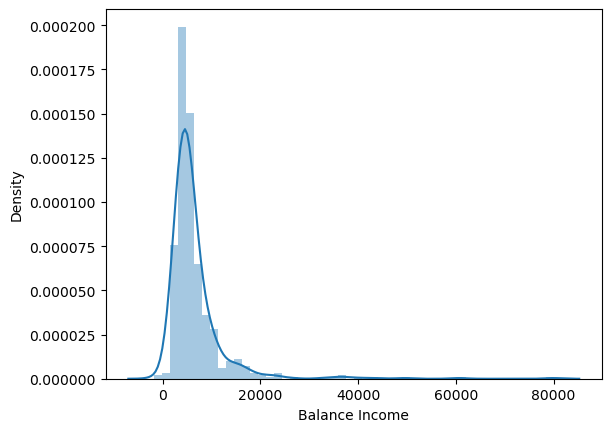

In [145]:
#New Balance Income feature

train['Balance Income'] = train['Total_Income'] - (train['EMI']*1000)
test['Balance Income'] = test['Total_Income'] - (test['EMI']*1000)

sns.distplot(train['Balance Income'])

In [ ]:
#Drop vars used to create new features (don't want correlated vars)

train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
                 'Loan_Amount_Term'], axis=1)
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
                 'Loan_Amount_Term'], axis=1)